Notebook developed by [Valderico Carratala](https://github.com/ludovicoderic).

In [4]:
from os import path
import sys
import time

import cv2
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from tabulate import tabulate

from skimage import io

# shape and texture descriptors
from skimage.measure import label
from skimage.measure import regionprops
from skimage.morphology import convex_hull_image
from skimage.feature import greycomatrix, greycoprops
from skimage.feature import hog
from skimage.feature import local_binary_pattern

from scipy.ndimage.morphology import binary_fill_holes as bfh

print(cv2.__version__)

4.5.5


# Basic Image Analysis with OpenCV

## Sumary

**BASICS**
- Load/show Image
- Save Image
- Histograms
    - Calculate Histograms
    - Equalize Histograms
- Brightness And Contrast
- Color Space Conversion

**IMAGE PROCESSING:TRANSFORMATIONS**
- Punctual transformations:
    - AND, OR, XOR, NOT
    - addition, subtraction, multiplication, division
    - blending
   
- Global transformations:
    - Fourier transform
- Geometric transformations
- Neighborhood transformations
    - Convolution filters
    - Median fiters
- Morphological transformations
    - Erosion and dilation
    - Opening, closing and Top-Hat

**IMAGE PROCESSING:FILTERING AND DETECTION OF EDGES, LINES, ISOLATED POINTS AND CORNERS**
- BORDER DETECTION
    - Sobel (image, color depth, derivative orders x, y, kernel size)
    - Laplacian (image, color depth)
    - Canny
- LINE DETECTION
- DETECTION OF ISOLATED POINTS
- CORNER DETECTION: Harris

**IMAGE PROCESSING: SEGMENTATION**
- Umbralize (thresholding): manual and OTSU
- Segmentation through color conversions
- Semantic Segmentation With Edge Detection (Canny)
- Region growing
- Clustering
- Graph-based methods
- Saliency methods

**IMAGE FEATURES**
- SHAPE DESCRIPTORS
    - Moments
    - Hu moments
    - Freeman chains
    - Descriptor Shape Context (SC)
- TEXTURE DESCRIPTORS
    - Matrix of coocurrence (GLCM)
    - Histogram of Oriented Gradients (HOG)
    - Local Binary Patterns (LBP)
    - local characteristics
        - Detector: MSER
        - Descriptor: ORB
    - Feature matching

**IMAGE RECOGNITION**
- Mark points on a Image with the mouse
- Access the Webcam 
- Search by similarity
    - binary descriptors
    - Local descriptors based on points of interest
        - SIFT
        - SURF
- Feature matching
- Dimensionality reduction
    - Bag of Words (BoW)
    - PCA y LDA
- Face detection
    - Mediapipe library
    - Caffe DL
    - HOG SVM
    


# OPENCV BASICS

### Load / Show

In [10]:
people_path = path.join("res", "Lena_RGB.png")

In [11]:
# Load img
img = cv2.imread(people_path)

if(img.data == None):
    print(f'Could not open or find the image')
    

In [4]:
# read Pixel
img[0,0]

array([124, 135, 225], dtype=uint8)

In [5]:
# Show img
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyWindow('Image')

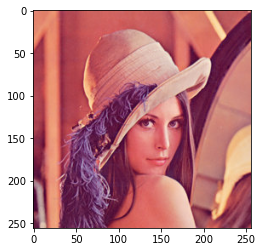

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Local save

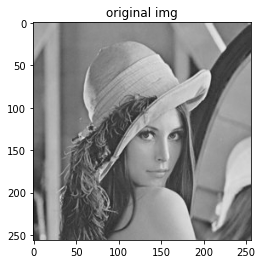

True

In [7]:
## FLAGS
#   1 or IMREAD_COLOR (default)
#   0 or IMREAD_GRAYSCALE: load an image in grayscale mode
#  -1 or IMREAD_UNCHANGED: load an image including alpha channel

img = cv2.imread('res/Lena_RGB.png', cv2.IMREAD_GRAYSCALE) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # to RGB

plt.imshow(img)
plt.title('original img')
plt.show()


cv2.imwrite('res/Lena_RGB_BW.png', img)

## Histograms

### Calculate and save histograms

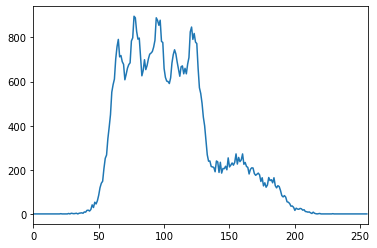

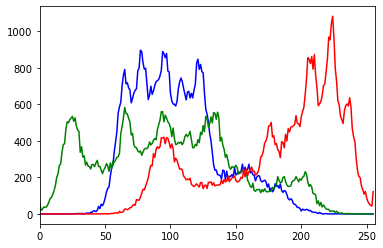

In [11]:
img = cv2.imread('res/Lena_RGB.png')

## ON THE CHANNELS - OPENCV
## 1. Channel to channel
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.xlim([0, 256])
plt.plot(hist)
plt.show()

## 2. One for each channel (without using plt.plot(hist))
img = cv2.imread('res/Lena_RGB.png')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


## ON THE FULL IMAGE
## 1. NUMPY 
# hist,bins = np.histogram(img.ravel(),256,[0,256]) 
# plt.xlim([0, 256])
# plt.plot(hist)
# plt.show()

# ## 2. MATPLOTLIB
# plt.hist(img.ravel(),256,[0,256])
# plt.xlim([0, 256])
# plt.show()

## SAVE IMAGE IN LOCAL MEMORY
# plt.hist(img.ravel(),256,[0,256])
# plt.title('Mean')
# plt.xlabel("value")
# plt.ylabel("Frequency")
# plt.savefig('images/Lena_hist.png')

### Equalize histogram

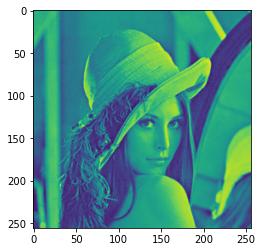

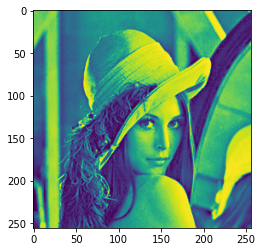

In [12]:
img = cv2.imread('res/Lena_RGB.png', cv2.IMREAD_GRAYSCALE)
img_equ = cv2.equalizeHist(img)

plt.imshow(img)
plt.show()
plt.imshow(img_equ)
plt.show()

## Brightness and contrast

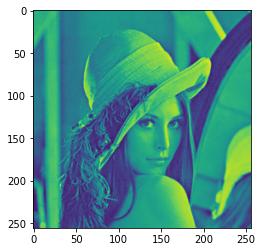

brightness: 132.36602783203125
contrast: 44.81712578756081


In [13]:
# Read grayscale image and return brightness and contrast
img = cv2.imread('res/Lena_RGB.png', 0)
img_equ = cv2.equalizeHist(img)

plt.imshow(img)
plt.show()

brillo = cv2.mean(img) # returns the mean of the values in an array -> brightness

h = img.shape[0] # cols
w = img.shape[1] # rows
num_pixeles = h * w

suma = 0
for i in range(0, h):
    for j in range(0, w):
        suma = suma + (img[i][j] - brillo[0])**2
        
contraste = (suma/num_pixeles)**(1/2)



print(f'brightness: {brillo[0]}')
print(f'contrast: {contraste}')

### Intesity transformations

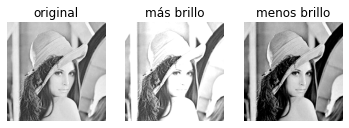

In [14]:
# Birghtness change
img = cv2.imread('res/Lena_RGB.png')
img = img[:,:,2] # red color

mas_brillo = 50
menos_brillo = -100
mas_brillo_img = cv2.add(img, mas_brillo) # Important the "cv2.add" instead of "+"
menos_brillo_img = cv2.add(img, menos_brillo)

fig, ax = plt.subplots(1,3)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(mas_brillo_img, cmap='gray'), ax[1].set_title('más brillo')
ax[1].axis('off')
ax[2].imshow(menos_brillo_img, cmap='gray'), ax[2].set_title('menos brillo')
ax[2].axis('off')
plt.show()

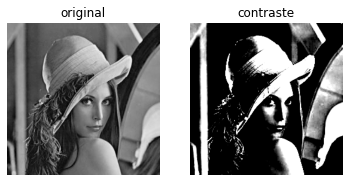

In [15]:
# Contrast change according to the GIMP program
img = cv2.imread('res/Lena_RGB.png')
img = img[:,:,1] # green channel

contraste = 100

f = 131*(contraste + 127)/(127*(131-contraste))
alpha_c = f
gamma_c = 127*(1-f)

contrast_img = cv2.addWeighted(img, alpha_c, img, 0, gamma_c)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(contrast_img, cmap='gray'), ax[1].set_title('contraste')
ax[1].axis('off')
plt.show()

# To view the image when the contrast is decreased...
#cv2.imwrite('contrast.png', contrast_img)

## Color Space Conversions

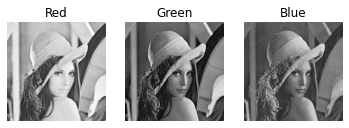

<class 'numpy.ndarray'>
[[124 124 124 ... 127 122 103]
 [125 124 122 ... 144 132  97]
 [122 122 119 ... 134 119  86]
 ...
 [ 63  64  62 ...  71  74  75]
 [ 62  60  60 ...  82  80  75]
 [ 60  57  57 ...  90  83  77]]


In [8]:
# Decompose image into components
img = cv2.imread('res/Lena_RGB.png')

(B, G, R) = cv2.split(img)

fig, ax = plt.subplots(1,3)
ax[0].imshow(R, cmap='gray'), ax[0].set_title('Red')
ax[0].axis('off')
ax[1].imshow(G, cmap='gray'), ax[1].set_title('Green')
ax[1].axis('off')
ax[2].imshow(B, cmap='gray'), ax[2].set_title('Blue')
ax[2].axis('off')
plt.show()

print(type(B))
print(B)

In [9]:
# Recompose
img_alt = cv2.merge((B,R,G))

- Save image

In [10]:
lena_alt_path = path.join("res", "lena_alt.jpg")
cv2.imwrite(lena_alt_path, img_alt)

True

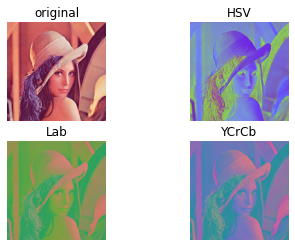

In [16]:
img = io.imread('res/Lena_RGB.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray-scale

HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # (H)ue, (S)aturation and (V)alue

Lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab) # (L)uminosidad, a-b colores complementarios

YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) # Y-Luma, Cr-Cb crominancia rojo y azul

fig, ax = plt.subplots(2,2)
ax[0,0].imshow(img.astype('uint8'), cmap='gray'), ax[0,0].set_title('original')
ax[0,0].axis('off')
ax[0,1].imshow(HSV.astype('uint8'), cmap='gray'), ax[0,1].set_title('HSV')
ax[0,1].axis('off')
ax[1,0].imshow(Lab.astype('uint8'), cmap='gray'), ax[1,0].set_title('Lab')
ax[1,0].axis('off')
ax[1,1].imshow(YCrCb.astype('uint8'), cmap='gray'), ax[1,1].set_title('YCrCb')
ax[1,1].axis('off')
plt.show()

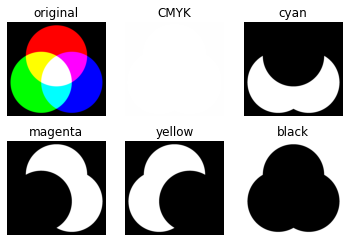

In [17]:
# RGB to CMYK
import numpy as np
from skimage import io

img = io.imread('res/colores.png')
rgb = cv2.imread('res/colores.png').astype('uint8')
rgb = rgb.astype('uint8')/255

with np.errstate(invalid='ignore', divide='ignore'):
    K = 1 - np.max(rgb, axis=2)
    C = (1-rgb[...,2] - K)/(1-K)
    M = (1-rgb[...,1] - K)/(1-K)
    Y = (1-rgb[...,0] - K)/(1-K)

CMYK = (np.dstack((C,M,Y,K)))
C,M,Y,K = cv2.split(CMYK)

fig, ax = plt.subplots(2,3)
ax[0,0].imshow(img, cmap='gray'), ax[0,0].set_title('original')
ax[0,0].axis('off')
ax[0,1].imshow(CMYK.astype('uint8'), cmap='gray'), ax[0,1].set_title('CMYK')
ax[0,1].axis('off')
ax[0,2].imshow(C.astype('uint8'), cmap='gray'), ax[0,2].set_title('cyan')
ax[0,2].axis('off')
ax[1,0].imshow(M.astype('uint8'), cmap='gray'), ax[1,0].set_title('magenta')
ax[1,0].axis('off')
ax[1,1].imshow(Y.astype('uint8'), cmap='gray'), ax[1,1].set_title('yellow')
ax[1,1].axis('off')
ax[1,2].imshow(K.astype('uint8'), cmap='gray'), ax[1,2].set_title('black')
ax[1,2].axis('off')
plt.show()

- Color RGB, Red Green Blue
- Pixel Range: 0 - 255
- OpenCV opens img in BGR as default

# IMAGE PROCESSING: TRANSFORMATIONS

## Punctual transformations

#### AND, OR, XOR and NOT
`bitwise_not(src1, dst)`

`bitwise_and(src1, src2, dst)`

`bitwise_or(src2, src2, dst)`

`bitwise_xor(src1, src2, dst)`

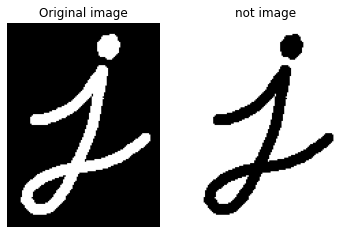

In [55]:
img = cv2.imread('res/j.png', 0)
img2 = cv2.imread('res/j2.png', 0)

img_not = cv2.bitwise_not(img)

fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), ax[0].set_title('Original image')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(img_not, cv2.COLOR_BGR2RGB)), ax[1].set_title('not image')
ax[1].axis('off')

plt.show()

#### addition, subtraction, multiplication, division

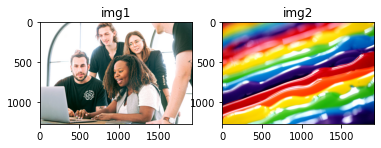

In [24]:
people_path = path.join("res", "people.jpg")
color_path = path.join("res", "overlay.jpg")

img = cv2.imread(people_path)
img_color = cv2.imread(color_path)

fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), ax[0].set_title('img1')
ax[1].imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)), ax[1].set_title('img2')
plt.show()

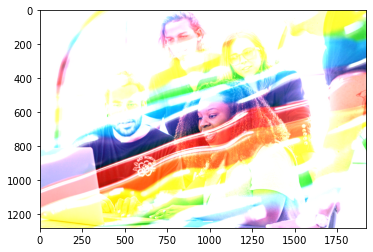

In [25]:
# Add two images

img_add = cv2.add(img, img_color)
# img_add = img + img_color

plt.imshow(cv2.cvtColor(img_add, cv2.COLOR_BGR2RGB))
plt.show()

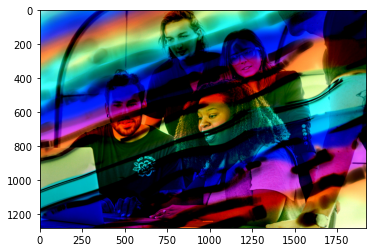

In [26]:
# Sub two images

img_sub = cv2.subtract(img, img_color)
# img_sub = img - img_color

plt.imshow(cv2.cvtColor(img_sub, cv2.COLOR_BGR2RGB))
plt.show()

#### Blending
- img = alpha * img1 + (1 - alpha) * img2
- 0 > alpha > 1
- addweighted
  - dst = img1 * alpha + img2 * beta + gamma

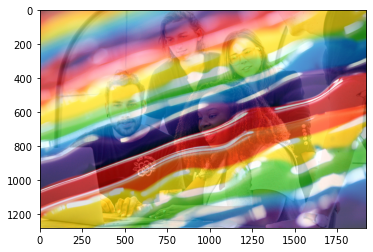

In [27]:
# Blend two images

img_blend = cv2.addWeighted(img, 0.3, img_color, 0.7, 0)

plt.imshow(cv2.cvtColor(img_blend, cv2.COLOR_BGR2RGB))
plt.show()

## Global transformations

#### Fourier transform

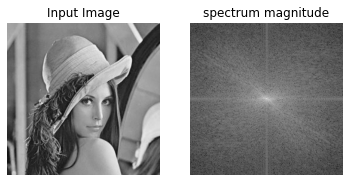

In [19]:
People_path = path.join("res", "Lena_RGB.png")
I = cv2.imread(people_path, 0)

if I is None:
    print('Error opening image')

rows, cols = I.shape
m = cv2.getOptimalDFTSize( rows )
n = cv2.getOptimalDFTSize( cols )
padded = cv2.copyMakeBorder(I, 0, m - rows, 0, n - cols, cv2.BORDER_CONSTANT, value=[0, 0, 0])

planes = [np.float32(padded), np.zeros(padded.shape, np.float32)]
complexI = cv2.merge(planes)         # Add to the expanded another plane with zeros

cv2.dft(complexI, complexI)         # this way the result may fit in the source matrix

cv2.split(complexI, planes)                   # planes[0] = Re(DFT(I), planes[1] = Im(DFT(I))
cv2.magnitude(planes[0], planes[1], planes[0])# planes[0] = magnitude
magI = planes[0]

matOfOnes = np.ones(magI.shape, dtype=magI.dtype)
cv2.add(matOfOnes, magI, magI) #  switch to logarithmic scale
cv2.log(magI, magI)

magI_rows, magI_cols = magI.shape
# crop the spectrum, if it has an odd number of rows or columns
magI = magI[0:(magI_rows & -2), 0:(magI_cols & -2)]
cx = int(magI_rows/2)
cy = int(magI_cols/2)
q0 = magI[0:cx, 0:cy]         # Top-Left - Create a ROI per quadrant
q1 = magI[cx:cx+cx, 0:cy]     # Top-Right
q2 = magI[0:cx, cy:cy+cy]     # Bottom-Left
q3 = magI[cx:cx+cx, cy:cy+cy] # Bottom-Right
tmp = np.copy(q0)               # swap quadrants (Top-Left with Bottom-Right)
magI[0:cx, 0:cy] = q3
magI[cx:cx + cx, cy:cy + cy] = tmp
tmp = np.copy(q1)               # swap quadrant (Top-Right with Bottom-Left)
magI[cx:cx + cx, 0:cy] = q2
magI[0:cx, cy:cy + cy] = tmp

cv2.normalize(magI, magI, 0, 1, cv2.NORM_MINMAX) # Transform the matrix with float values into a


fig, ax = plt.subplots(1,2)
ax[0].imshow(I, cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(magI, cmap='gray'), ax[1].set_title('spectrum magnitude')
ax[1].axis('off')
plt.show()

## Geometric transformations

#### Translation

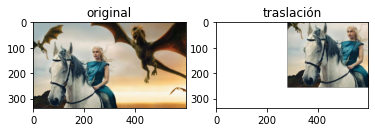

In [20]:
# Traslation
img = io.imread('res/GOT.png')
rows, cols, ch = img.shape
 
M = np.float32([[1,0,280],[0,1,-80]]) # Defino la matriz de transformación
new_img = cv2.warpAffine(img,M,(cols,rows)) # Aplico la transformación

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('traslación')
plt.show()

#### Rotation

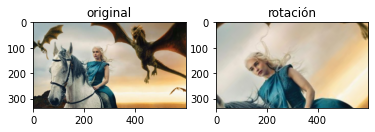

In [22]:
# Rotation
img = io.imread('res/GOT.png')
rows, cols, ch = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),angle=45,scale=2) # Defino la matriz de transformación
new_img = cv2.warpAffine(img,M,(cols,rows)) # Aplico la transformación

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('rotación')
plt.show()

#### Flip

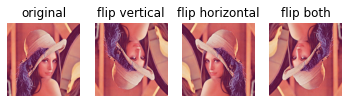

In [19]:
# Flipping
img = io.imread('res/Lena_RGB.png')
  
flipVertical = cv2.flip(img, 0)
flipHorizontal = cv2.flip(img, 1)
flipBoth = cv2.flip(img, -1)
 
figs, ax = plt.subplots(1,4)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(flipVertical, cmap='gray'), ax[1].set_title('flip vertical')
ax[1].axis('off')
ax[2].imshow(flipHorizontal, cmap='gray'), ax[2].set_title('flip horizontal')
ax[2].axis('off')
ax[3].imshow(flipBoth, cmap='gray'), ax[3].set_title('flip both')
ax[3].axis('off')

plt.show()

#### Resize

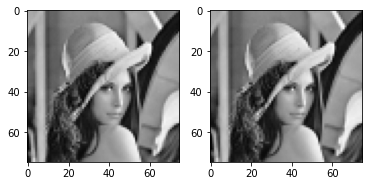

In [ ]:
# Change spatial resolution (resize)
img = cv2.imread('res/Lena_RGB.png', 0)

h = img.shape[0] # cols
w = img.shape[1] # rows


# 50% of original size
resized = cv2.resize(img, (int(h*0.5),int(w*0.5)), interpolation = cv2.INTER_AREA)

# size of 75x75
resized = cv2.resize(img, (75,75), interpolation = cv2.INTER_AREA)

figs, ax = plt.subplots(1,2)
ax[0].imshow(resized, cmap='gray')
ax[1].imshow(resized, cmap='gray')
plt.show()

#### Cropping

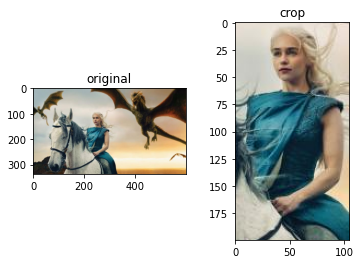

In [21]:
# Cropping
img = io.imread('res/GOT.png')

new_img = img[90:290, 200:305]

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('crop')
plt.show()

#### Perspective transform


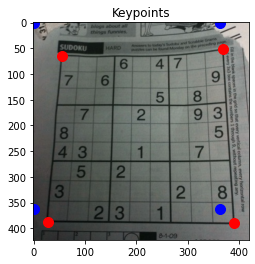

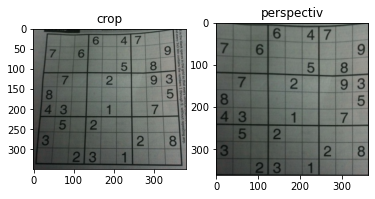

In [23]:
# Perspective transform
img = cv2.imread('res/sudoku.png')
rows, cols, ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[390,390]])
pts2 = np.float32([[0,0],[362,0],[0,362],[362,362]])

plt.imshow(img, cmap='gray')
for i in range(0,4):
    plt.plot(pts1[i,0], pts1[i,1], 'or', markersize=10)
    plt.plot(pts2[i,0], pts2[i,1], 'ob', markersize=10)
plt.title('Keypoints')
plt.show()
 
M = cv2.getPerspectiveTransform(pts1,pts2)
pers = cv2.warpPerspective(img,M,(362,362))

crop =  img[50:400,20:400]

figs, ax = plt.subplots(1,2)
ax[0].imshow(crop, cmap='gray'), ax[0].set_title('crop')
ax[1].imshow(pers, cmap='gray'), ax[1].set_title('perspectiv')
plt.show()


## Neighborhood transformations

### Convolution filters (filter2D(src, dst, ddepth, kernel))

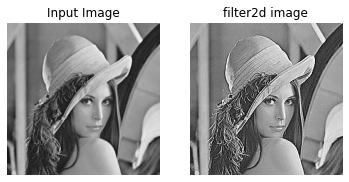

In [3]:
# Sharpening an Image

img = cv2.imread('res/Lena_RGB.png', 0)
# Defining the kernel of size 3x3
kernel = np.array([
  [0, -1, 0],
  [-1, 5, -1],
  [0, -1, 0]
])
 
resulting_image = cv2.filter2D(img, -1, kernel)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(resulting_image, cmap='gray'), ax[1].set_title('filter2d image')
ax[1].axis('off')
plt.show()

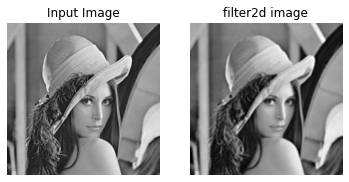

In [9]:
# Bluring an image

img = cv2.imread('res/Lena_RGB.png', 0)
# Defining the kernel of size 3x3
kernel = np.array([
  [1, 1, 1],
  [1, 1, 1],
  [1, 1, 1]
]) / 9
 
resulting_image = cv2.filter2D(img, -1, kernel)
 
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(resulting_image, cmap='gray'), ax[1].set_title('filter2d image')
ax[1].axis('off')
plt.show()

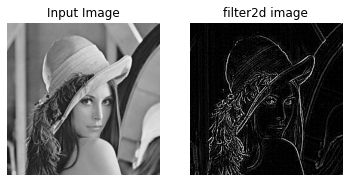

In [5]:
# Outline Edge Detection on an image

img = cv2.imread('res/Lena_RGB.png', 0)
# Defining the kernel of size 3x3
kernel = np.array([
  [-1, -1, -1],
  [-1, 8, -1],
  [-1, -1, -1]
])
 
resulting_image = cv2.filter2D(img, -1, kernel)
 
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(resulting_image, cmap='gray'), ax[1].set_title('filter2d image')
ax[1].axis('off')
plt.show()

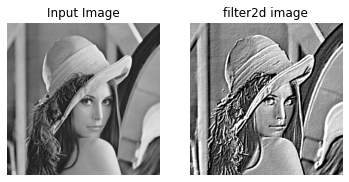

In [6]:
# Using Emboss Filter

img = cv2.imread('res/Lena_RGB.png', 0)
# Defining the Emboss kernel of size 3x3
kernel = np.array([
  [-2, -1, 0],
  [-1, 1, 1],
  [0, 1, 2]
])
 
resulting_image = cv2.filter2D(img, -1, kernel)
 
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(resulting_image, cmap='gray'), ax[1].set_title('filter2d image')
ax[1].axis('off')
plt.show()

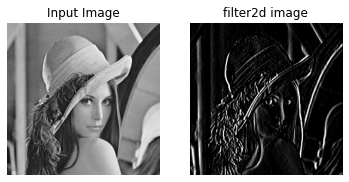

In [7]:
# Using Sobel Filter

img = cv2.imread('res/Lena_RGB.png', 0)
# Defining the Sobel kernel of size 3x3
kernel = np.array([
  [-1, 0, 1],
  [-2, 0, 2],
  [-1, 0, 1]
])
 
resulting_image = cv2.filter2D(img, -1, kernel)
 
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(resulting_image, cmap='gray'), ax[1].set_title('filter2d image')
ax[1].axis('off')
plt.show()

### Median filter (for salt & pepper noise)

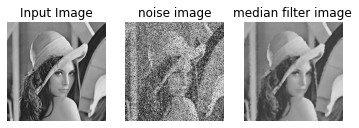

In [13]:
from skimage.util import random_noise

img = cv2.imread('res/Lena_RGB.png', 0)

# Add salt and pepper noise to the image
noise_img = random_noise(img, mode="s&p",amount=0.3)
noise_img = np.array(255*noise_img, dtype = 'uint8')

# Apply median filter
median = cv2.medianBlur(noise_img,5)

fig, ax = plt.subplots(1,3)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(noise_img, cmap='gray'), ax[1].set_title('noise image')
ax[1].axis('off')
ax[2].imshow(median, cmap='gray'), ax[2].set_title('median filter image')
ax[2].axis('off')
plt.show()

## Morphological transformations

### Erosion & dilation
Erosion: can separate joined objects, and remove extrusions. Note: reduce the size of objects.

Dilation: can repair breaches, and also intrusions. Eye: Increases the size of objects

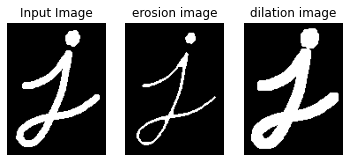

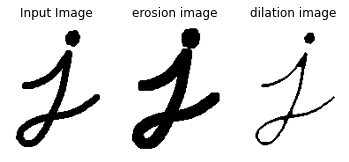

In [56]:
img = cv2.imread('res/j.png', 0)
img2 = cv2.imread('res/j2.png', 0)

# Taking a matrix of size 5 as the kernel
kernel = np.ones((5, 5), np.uint8)
 
# third parameter is the number of iterations, which will
# determine how much you want to erode/dilate a given image.
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)

img2_erosion = cv2.erode(img2, kernel, iterations=1)
img2_dilation = cv2.dilate(img2, kernel, iterations=1)

fig, ax = plt.subplots(1,3)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(img_erosion, cmap='gray'), ax[1].set_title('erosion image')
ax[1].axis('off')
ax[2].imshow(img_dilation, cmap='gray'), ax[2].set_title('dilation image')
ax[2].axis('off')
plt.show()

fig, ax = plt.subplots(1,3)
ax[0].imshow(img2, cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(img2_erosion, cmap='gray'), ax[1].set_title('erosion image')
ax[1].axis('off')
ax[2].imshow(img2_dilation, cmap='gray'), ax[2].set_title('dilation image')
ax[2].axis('off')
plt.show()

### Gradient
The purpose of morphological gradients is to highlight contours. Thus they are useful for edge detection and segmentation.

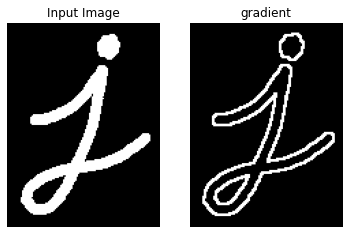

In [47]:
# gradient

img = cv2.imread("res/j.png", 0)

filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
    
# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(img, 
                              cv2.MORPH_GRADIENT,
                              kernel)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(tophat_img, cmap ='gray'), ax[1].set_title('gradient')
ax[1].axis('off')
plt.show()

### Opening: erode -> dilate

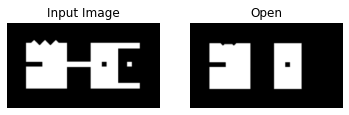

In [70]:
# opening

img = cv2.imread("res/dino.png", 0)

filterSize = (20, 20)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
    
opening_img = cv2.morphologyEx(img, 
                              cv2.MORPH_OPEN,
                              kernel)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(opening_img, cmap ='gray'), ax[1].set_title('Open')
ax[1].axis('off')
plt.show()

### Closing: dilate -> erode

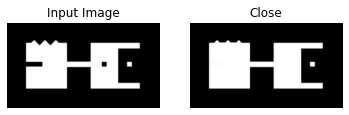

In [73]:
# closing

img = cv2.imread("res/dino.png", 0)

filterSize = (15, 15)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
    
closing_img = cv2.morphologyEx(img, 
                              cv2.MORPH_CLOSE,
                              kernel)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(closing_img, cmap ='gray'), ax[1].set_title('Close')
ax[1].axis('off')
plt.show()

### Top-hat
White top-hat returns an image containing those elements of the input image that are smaller than the structuring element and brighter than its surroundings.

Used to enhance bright objects of interest in a dark background.

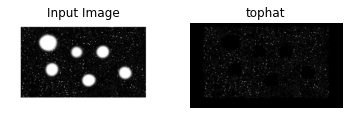

In [75]:
# top-hat

img = cv2.imread("res/Cosmos_original.jpg", 0)

filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
    
# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(img, 
                              cv2.MORPH_TOPHAT,
                              kernel)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(tophat_img, cmap ='gray'), ax[1].set_title('tophat')
ax[1].axis('off')
plt.show()

### Black-hat
Black top-hat returns an image containing those elements of the input image that are smaller than the structuring element and darker than its surroundings.

Used to enhance dark objects of interest in a bright background

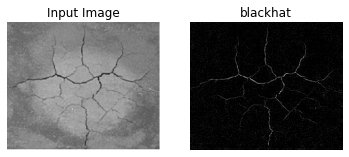

In [78]:
# black-hat

img = cv2.imread("res/black-top.png", 0)

# Defining the kernel to be used in Top-Hat
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
  
# Applying the Black-Hat operation
tophat_img = cv2.morphologyEx(img, 
                              cv2.MORPH_BLACKHAT,
                              kernel)
  
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(tophat_img, cmap='gray'), ax[1].set_title('blackhat')
ax[1].axis('off')
plt.show()

# IMAGE PROCESSING: FILTERING AND DETECTION

## Border detection

- **Sobel** (Better detection on diagonal edges than the Prewitt filter)
- **Laplacian** (It has a strong response to contour points but also to edges, contourlines, and noise.)
- **Prewitt** (Better detection on horizontal and vertical edges than Sobel.)
- **Gaussian filter** (highly effective in removing Gaussian noise from an image.)
- **Bilateral filter** (highly effective in noise removal while keeping edges sharp, better than a Gaussian filter.)
- **Canny**

In [100]:
# Show images
def show_image(sub, image, title):
    plt.subplot(2, 2, sub)
    plt.imshow(image, cmap = 'gray')
    title_obj = plt.title(title)
    plt.setp(title_obj, color='w')
    plt.xticks([])
    plt.yticks([])

In [101]:
# load arrows img
arrows_path = path.join("res", "arrows.jpg")
img = cv2.imread(arrows_path, 0)

#### Sobel, Laplacian

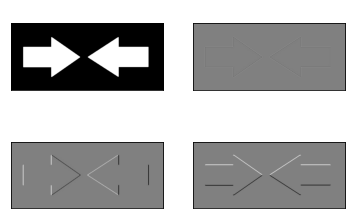

In [102]:
# Apply filters
laplacian = cv2.Laplacian(img, cv2.CV_64F)

sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

show_image(1, img, 'Original')
show_image(2, laplacian, 'Laplacian')
show_image(3, sobel_x, 'Sobel X')
show_image(4, sobel_y, 'Sobel Y')

plt.show()

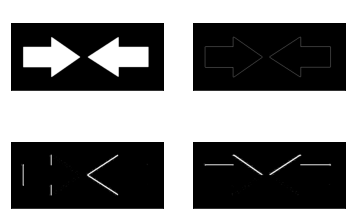

In [103]:
# Apply filters with only 8 bits per pixel
laplacian = cv2.Laplacian(img, cv2.CV_8U)

sobel_x = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=5)

show_image(1, img, 'Original')
show_image(2, laplacian, 'Laplacian')
show_image(3, sobel_x, 'Sobel X')
show_image(4, sobel_y, 'Sobel Y')

plt.show()

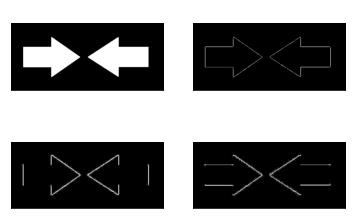

In [104]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_x = np.uint8(np.absolute(sobel_x))

sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = np.uint8(np.absolute(sobel_y))



show_image(1, img, 'Original')
show_image(2, laplacian, 'Laplacian')
show_image(3, sobel_x, 'Sobel X')
show_image(4, sobel_y, 'Sobel Y')
plt.show()

#### Gaussian blur, bilateral filter, Prewitt

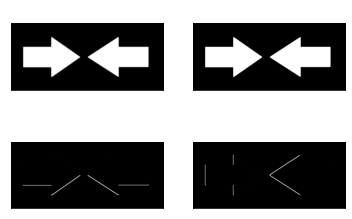

In [106]:
# Gaussian blur
blur = cv2.GaussianBlur(img,(5,5),0)

# Bilateral Filter
bilateral = cv2.bilateralFilter(img,9,75,75)

# Prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img, -1, kernelx)
img_prewitty = cv2.filter2D(img, -1, kernely)

show_image(1, blur, 'Gaussian blur')
show_image(2, bilateral, 'Bilateral Filter')
show_image(3, img_prewittx, 'Prewitt X')
show_image(4, img_prewitty, 'Prewitt X')

#### Canny

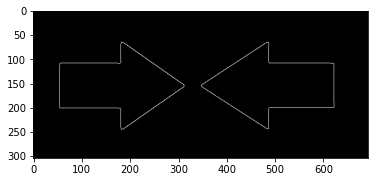

In [33]:
down_threshold = 50
up_threshold = 150

canny = cv2.Canny(img,down_threshold,up_threshold)
plt.imshow(canny, cmap='gray')
plt.show()

## Line detection

- Hough transform
- Polygonal approximation, splines
- Least squares, RANSAC, etc.
- Active contours: snakes
- etc.

#### HOUGH

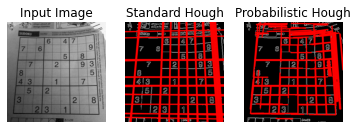

In [160]:
src = cv2.imread('res/sudoku.png', 0)

dst = cv2.Canny(src, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (255,0,0), 3, cv2.LINE_AA)


linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv2.LINE_AA)
  
fig, ax = plt.subplots(1,3)
ax[0].imshow(src, cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(cdst, cmap='gray'), ax[1].set_title('Standard Hough')
ax[1].axis('off')
ax[2].imshow(cdstP, cmap='gray'), ax[2].set_title('Probabilistic Hough')
ax[2].axis('off')
plt.show()


## Detection of isolated points

A mask (eg Laplacian) can be used to detect an isolated point by convolution.

#### Laplacian
It has a strong response to contour points but also to edges, contourlines, and noise. Detects edges in multiple directions simultaneously and ignores smooth areas.

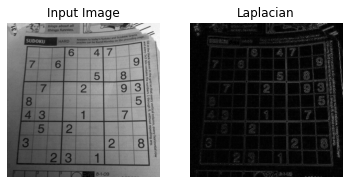

In [136]:
img = cv2.imread('res/sudoku.png', 0)

# Apply filters with only 8 bits per pixel
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(laplacian, cmap='gray'), ax[1].set_title('Laplacian')
ax[1].axis('off')

plt.show()

## Corner detection (HARRIS)

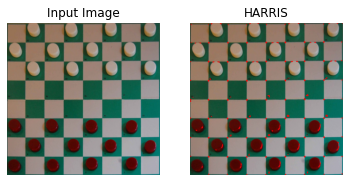

In [163]:
img = cv2.imread('res/damas_corrected.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray) # modify the data type setting to 32-bit floating point

# apply the cv2.cornerHarris method to detect the corners
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img2 = img.copy()
img2[dst > 0.01 * dst.max()] = [0,0,255]

fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB), cmap='gray'), ax[1].set_title('HARRIS')
ax[1].axis('off')
plt.show()

# IMAGE PROCESSING: SEGMENTATION

- Umbralize (Thresholding): manual and **OTSU**
- Segmentation through color conversions
- Semantic Segmentation With Edge Detection (Canny)
- Region growing

### Umbralize (Thresholding)

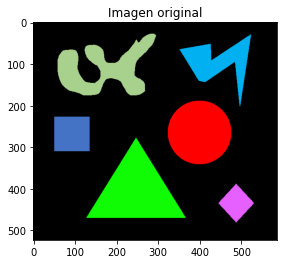

In [34]:
# SEGMENTATION THROUGH THRESHOLDING
# Read an image

img = cv2.imread('res/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb, cmap='gray')
plt.title('Imagen original')
plt.show()

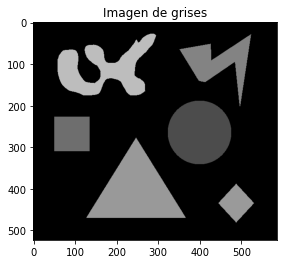

In [35]:
# Convert the image to grayscale

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray_img = cv2.imread('res/figuras.png', 0) # A way to read the image directly in grayscale

plt.imshow(gray_img, cmap='gray')
plt.title('Imagen de grises')
plt.show()

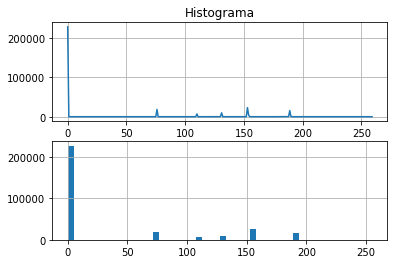

In [36]:
# Calculate the histogram
hist = cv2.calcHist([gray_img], [0], None, [260], [0, 260]) # [0] son los canales, None la máscara

fig, ax = plt.subplots(2,1)

ax[0].plot(hist)
ax[0].grid()
ax[0].set_title('Histograma')

# Another way to display the histogram (display only)
ax[1].hist(gray_img.ravel(), bins=50)
ax[1].grid()

plt.show()

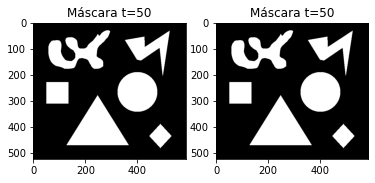

[  0 255]


In [37]:
# Set the threshold based on the previous histogram
t = 50

# Extract the binary mask
maxim = int(np.max(np.unique(gray_img)))
_, mask = cv2.threshold(gray_img, t, int(maxim), cv2.THRESH_BINARY)

# Other ways to extract the mask
mask2 = gray_img.copy()
mask2 = mask2>t

# We visualize to corroborate
fig, ax = plt.subplots(1,2)
ax[0].imshow(mask, cmap='gray')
ax[0].set_title('Máscara t=' + str(t))

ax[1].imshow(mask2, cmap='gray')
ax[1].set_title('Máscara t=' + str(t))
plt.show()

print(np.unique(mask)) # Pay attention to the formats (bool, uint8, etc.)

### OTSU umbral detection
algorithm that is frequently used to find the best value of a global threshold.

[0 1]


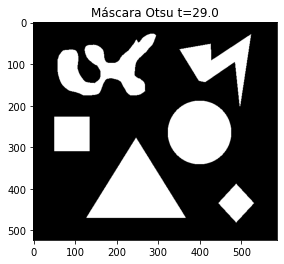

In [38]:
# We set the threshold with the OTSU method
t, mask = cv2.threshold(gray_img,0,1,cv2.THRESH_OTSU) # 0 es por defecto y 1 es el valor máximo de la máscara
print(np.unique(mask))

# We visualize to verify that the same result is obtained
plt.imshow(mask, cmap='gray')
plt.title('Máscara Otsu t=' + str(t))
plt.show()

### Segmentation through color conversions 

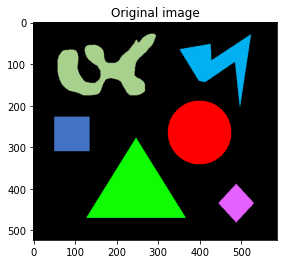

In [39]:
# We imagine that we want to segment only the red circle
img = cv2.imread('res/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb, cmap='gray')
plt.title('Original image')
plt.show()

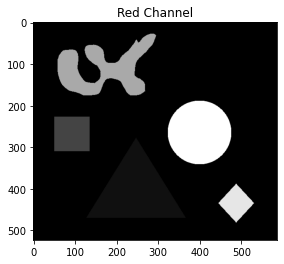

In [40]:
# Get the red channel
R = img[:,:,2]

plt.imshow(R, cmap='gray')
plt.title('Red Channel')
plt.show()

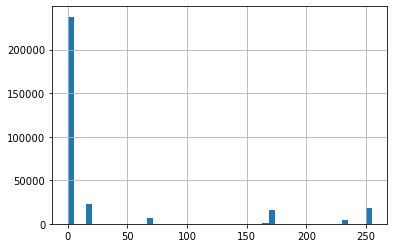

255


In [41]:
# We look at the histogram
plt.hist(R.ravel(), bins=50)
plt.grid(True)
plt.show()
print(np.max(R))

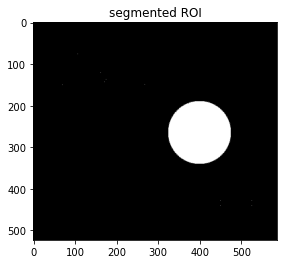

In [42]:
# Set the threshold and extract the mask
t=np.max(R)
mask = R.copy()
mask[mask<t] = 0

plt.imshow(mask, cmap='gray')
plt.title('segmented ROI')
plt.show()

### Semantic Segmentation With Edge Detection (canny)

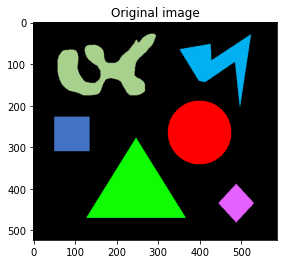

In [43]:
img = cv2.imread('res/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Original image')
plt.show()

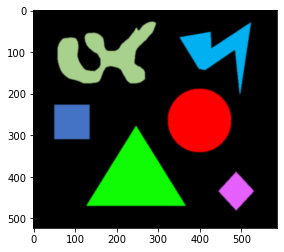

In [44]:
# We apply a Gaussian filter to blur the high frequencies
img_gaus = cv2.GaussianBlur(img_rgb, (5,5), 0) # (5x5) is the size of the filter and 0 is the standard deviation
plt.imshow(img_gaus, cmap='gray')
plt.show()

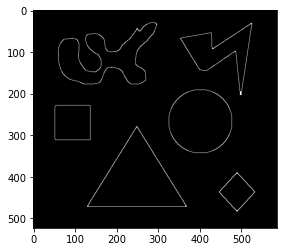

In [45]:
# Canny edge detection
canny = cv2.Canny(img_gaus, 255/3, 255) # minValue and maxValue. Canny recomiendo que minValue sea 3 veces mayor que maxValue
kernel = np.ones((2,2), 'uint8')
canny = cv2.dilate(canny, kernel, iterations=2)
canny = cv2.erode(canny, kernel, iterations=2)

plt.imshow(canny, cmap='gray')
plt.show()

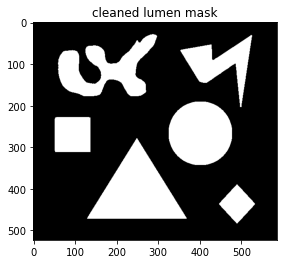

In [46]:
# Fill objects (only fill if they are not in contact with the image boundary)
from scipy.ndimage.morphology import binary_fill_holes as bfh

bordes = canny.copy()
filled_bordes = bfh(bordes)

plt.imshow(filled_bordes.astype('uint8'), cmap='gray')
plt.title('cleaned lumen mask')
plt.show()

### Watershed

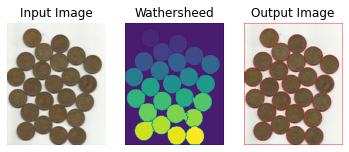

In [20]:
img = cv2.imread('res/water_coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img2 = img.copy()
img2[markers == -1] = [0,0,255]

fig, ax = plt.subplots(1,3)
ax[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), cmap='gray'), ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(markers), ax[1].set_title('Wathersheed')
ax[1].axis('off')
ax[2].imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)), ax[2].set_title('Output Image')
ax[2].axis('off')
plt.show()

### Region Growing

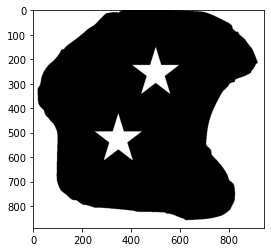

In [26]:
img = cv2.imread('res/estrellas.png', 0)

plt.imshow(img, cmap='gray')
plt.show()

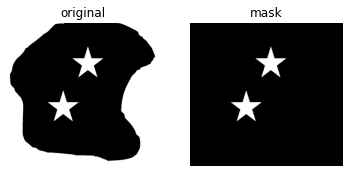

In [27]:
# Create a copy of the image
mask = img.copy()

# Define a black reference image
h, w = img.shape
ref = np.zeros((h+2, w+2), np.uint8)

# Set the seed. In this case in the upper left corner (position 0,0) to fill from there
cv2.floodFill(mask, ref, (0,0), 0); # Since we are interested in filling with black, we use the 0 in the last position

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(mask, cmap='gray'), ax[1].set_title('mask')
ax[1].axis('off')
plt.show()

### Clustering 

(-0.5, 255.5, 255.5, -0.5)

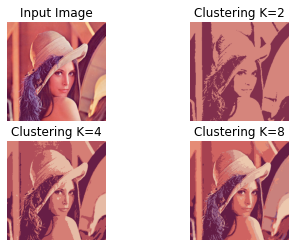

In [35]:
img = cv2.imread('res/Lena_RGB.PNG')
Z = img.reshape((-1, 3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

## K = 4
K = 4
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res3 = res.reshape((img.shape))

## k = 8
K = 8
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res4 = res.reshape((img.shape))

fig, ax = plt.subplots(2,2)
ax[0,0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), cmap='gray'), ax[0,0].set_title('Input Image')
ax[0,0].axis('off')
ax[0,1].imshow(cv2.cvtColor(res2,cv2.COLOR_BGR2RGB)), ax[0,1].set_title('Clustering K=2')
ax[0,1].axis('off')
ax[1,0].imshow(cv2.cvtColor(res3,cv2.COLOR_BGR2RGB)), ax[1,0].set_title('Clustering K=4')
ax[1,0].axis('off')
ax[1,1].imshow(cv2.cvtColor(res4,cv2.COLOR_BGR2RGB)), ax[1,1].set_title('Clustering K=8')
ax[1,1].axis('off')

### Graph/based methods 

### Saliency methods 

# IMAGE FEATURES

## Shape descriptors

#### Region props & convex hull image

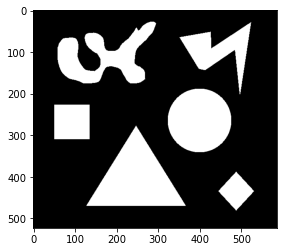

In [49]:
# First, we get the mask of the original image by thresholding with Otsu

img = cv2.imread('res/figuras.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(img_gray,0,1,cv2.THRESH_OTSU)

plt.imshow(mask, cmap='gray')
plt.show()

number of objects:  6
possible intensity values:  [0 1 2 3 4 5 6]


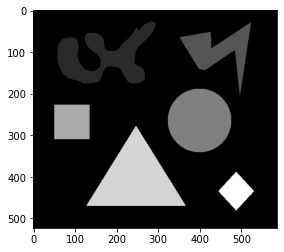

In [50]:
# Convert the binary image to a label image to access each object separately
from skimage.measure import label

lab, num = label(mask, return_num=True) # give each different target a label

# Important:
# In 'num' returns 6 values corresponding to the 6 objects in the image.
# However, 'lab' contains up to 7 different values, since it also takes the background of the image into account.
print('number of objects: ', num)
v,c = np.unique(lab, return_counts=True)
print('possible intensity values: ', v)

plt.imshow(lab, cmap='gray')
plt.show()

In [51]:
print(np.unique(lab))

[0 1 2 3 4 5 6]


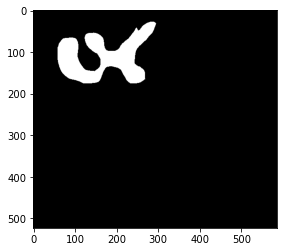

In [52]:
# We can independently access the object that interests us from its corresponding label
objeto = lab == 1
objeto = objeto.astype('uint8')
plt.imshow(objeto, cmap='gray')
plt.show()

(28, 59, 176, 296)


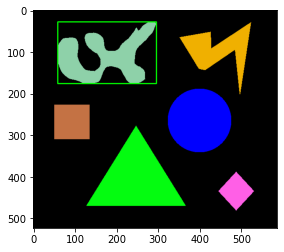

In [53]:
from skimage.measure import regionprops
# https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops

# Then, we can extract the bounding box of said object
prop = regionprops(objeto)
bbox = prop[0].bbox
print(bbox)
start_point = (bbox[1], bbox[0])
end_point = (bbox[3], bbox[2])
window = cv2.rectangle(img.copy(), start_point, end_point, (0, 255, 0), 2) # no confundir con croping
                     
plt.imshow(window, cmap='gray')
plt.show()

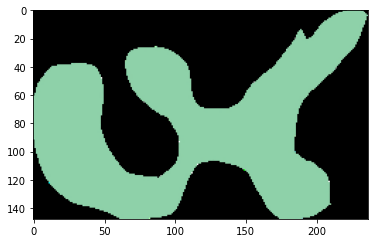

In [54]:
crop = img[bbox[0]:bbox[2],bbox[1]:bbox[3]]
plt.imshow(crop, cmap='gray')
plt.show()

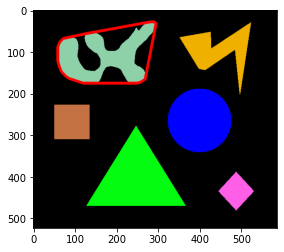

In [55]:
# And the convex hull image
from skimage.morphology import convex_hull_image

convex_image = convex_hull_image(objeto)
convex_image = convex_image.astype('uint8')
# plt.imshow(convex_image, cmap='gray')
# plt.show()

conts,_ = cv2.findContours(convex_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Encontramos los contornos en una máscara 
imagen = cv2.drawContours(img.copy(), conts, -1, (255,0,0), 5) # Dibujamos los contornos
                     
plt.imshow(imagen, cmap='gray')
plt.show()

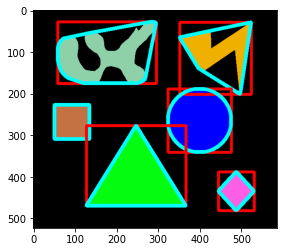

In [56]:
# We repeat the entire process for all the objects in the image
imagen = img.copy()
for i in range(1, num+1): 
    objeto = lab == i
    objeto = objeto.astype('uint8')
    
    # bbox
    prop = regionprops(objeto)
    bbox = prop[0].bbox
    imagen = cv2.rectangle(imagen, (bbox[1], bbox[0]), (bbox[3], bbox[2]), (255, 0, 0), 5)
    
    # covex hull
    convex_image = convex_hull_image(objeto)
    convex_image = convex_image.astype('uint8')
    conts,_ = cv2.findContours(convex_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    imagen = cv2.drawContours(imagen, conts, -1, (0,255,255), 8)

plt.imshow(imagen, cmap='gray')
plt.show()

In [57]:
# We are going to extract different geometric descriptors that will help us to characterize the objects.
# pip install tabulate
from tabulate import tabulate
import math

new_lab, new_num = label(mask, return_num=True)

# Extract the geometric characteristics
headers = ['','Rare', 'Lightning', 'Circle', 'Square', 'Triangle', 'Rhombus']
A,BB,CA,E,ED,EX,MA,MiA,OR,P,S,CO,R = ['area'], ['bbox_area'], ['convex_area'], ['eccentricity'], ['equiv_diameter'], \
['extent'], ['major_axis'], ['minor_axis'], ['orientation'], ['perimeter'], ['solidity'], ['compactness'], ['rectangularity']

for i in range(1,new_num+1):
    objeto = new_lab == i
    prop = regionprops(objeto.astype(np.uint8))
    
    A.append(np.round(prop[0].area, 4))
    BB.append(np.round(prop[0].bbox_area, 4))
    CA.append(np.round(prop[0].convex_area, 4))
    E.append(np.round(prop[0].eccentricity, 4))
    ED.append(np.round(prop[0].equivalent_diameter, 4))
    EX.append(np.round(prop[0].extent, 4))
    MA.append(np.round(prop[0].major_axis_length, 4))
    MiA.append(np.round(prop[0].minor_axis_length, 4))
    OR.append(np.round(prop[0].orientation, 4))
    P.append(np.round(prop[0].perimeter, 4))
    S.append(np.round(prop[0].solidity, 4))
    CO.append(np.round(4*math.pi*prop[0].area/prop[0].perimeter**2, 4))
    R.append(np.round(prop[0].area/prop[0].bbox_area, 4))


my_data = [tuple(A), tuple(BB), tuple(CA), tuple(E), tuple(ED), tuple(EX), \
          tuple(MA), tuple(MiA), tuple(OR), tuple(P), tuple(S), tuple(CO), tuple(R)]

print(tabulate(my_data, headers=headers))

                      Rare    Lightning      Circle     Square    Triangle    Rhombus
--------------  ----------  -----------  ----------  ---------  ----------  ---------
area            16198        10282       18344       7055       23119       4018
bbox_area       35076        29756       23104       7055       46127       7998
convex_area     27405        16959       18488       7055       23307       4102
eccentricity        0.8556       0.7941      0          0.2157      0.371      0.3866
equiv_diameter    143.61       114.418     152.828     94.7771    171.569     71.5254
extent              0.4618       0.3455      0.794      1           0.5012     0.5024
major_axis        268.45       186.995     152.828     98.1428    195.774     76.1969
minor_axis        138.975      113.644     152.828     95.8332    181.801     70.2735
orientation        -1.4236       1.5298      0.7854     1.5708      1.5708     0
perimeter        1029.77       736.02      503.245    332         717.962 

## Texture descriptors

- MATRIX OF COOCCURENCE (Gray-Level Cooccurence Matrix - GLCM)
- SIFT algorithm
- Feature matching
- Histogram of Oriented Gradients
- Local Binary Patterns (LBP)

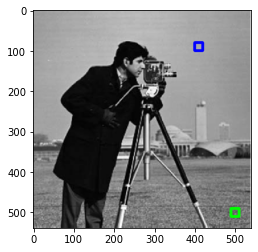

In [58]:
# First, we get the mask of the original image by thresholding with Otsu
img = cv2.imread('res/photographer.png')

window = cv2.rectangle(img.copy(), (400,80), (420,100), (0, 0, 255), 5)
window = cv2.rectangle(window, (490,490), (510,510), (0, 255, 0), 5)
plt.imshow(window, cmap='gray')
plt.show()

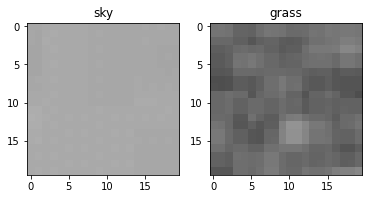

In [59]:
# We select a region of the sky and one of the grass
sky = img[80:100, 400:420]
grass = img[490:510, 490:510]

fig, ax = plt.subplots(1,2)
ax[0].imshow(sky, cmap='gray')
ax[0].set_title('sky')
ax[1].imshow(grass, cmap='gray')
ax[1].set_title('grass')
plt.show()

### MATRIX OF COOCCURENCE (Gray-Level Cooccurence Matrix - GLCM)

In [60]:
# MATRIX OF COOCCURENCE (Gray-Level Cooccurence Matrix - GLCM)
from skimage.feature import greycomatrix, greycoprops
headers = ['','cielo', 'hierba']
CN, DIS, H, ASM, E, COR = ['contrast'], ['dissimilarity'], ['homogeneity'], ['ASM'], ['energy'], ['correlation']

patches = []
patches.append(sky)
patches.append(grass)

for i in range(len(patches)):
    image = cv2.cvtColor(patches[i], cv2.COLOR_BGR2GRAY)
    GLCM = greycomatrix(image, distances=[2], angles=[0], levels=np.max(image)+1, symmetric=True, normed=True)
    # print(np.shape(GLCM))
    # plt.imshow(GLCM[:,:,0,0], cmap='gray')
    # plt.show()
    CN.append(greycoprops(GLCM, 'contrast')[0,0])
    DIS.append(greycoprops(GLCM, 'dissimilarity')[0,0])
    H.append(greycoprops(GLCM, 'homogeneity')[0,0])
    ASM.append(greycoprops(GLCM, 'ASM')[0,0])
    E.append(greycoprops(GLCM, 'energy')[0,0])
    COR.append(greycoprops(GLCM, 'correlation')[0,0])

my_data = [tuple(CN), tuple(DIS), tuple(H), tuple(ASM), tuple(E), tuple(COR)]

print(tabulate(my_data, headers=headers))

                  cielo        hierba
-------------  --------  ------------
contrast       2.15556   143.1
dissimilarity  0.788889    9.25
homogeneity    0.727447    0.113349
ASM            0.217087    0.00502701
energy         0.465926    0.0709014
correlation    0.517086    0.527263


### Histogram of Oriented Gradients (HOG)

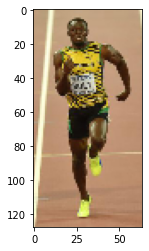

In [64]:
# First, we get the mask of the original image by thresholding with Otsu
img = io.imread('res/pedestrian.jpg')
img = np.float32(img/255)
crop = img[75:550,475:700]
crop = cv2.resize(crop, (64, 128))

plt.imshow(crop, cmap='gray')
plt.show()

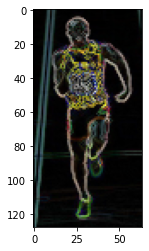

In [65]:
# Calculate the gradient with the Sobel kernel
crop = np.float32(crop)
gx = cv2.Sobel(crop, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(crop, cv2.CV_32F, 0, 1, ksize=1)

# Calculate the magnitude and direction of the gradient
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

# We display the image obtained in the magnitude of the gradient
mag = mag/np.max(mag)
plt.imshow(mag, cmap='gray')
plt.show()

In [66]:
# Calculation of the descriptor: Histogram of Oriented Gradients
from skimage.feature import hog

# In the latest version of skimage you will have to use a grayscale input image or
# define the flag: channel_axis=2 to work on the axis of the channels
H = hog(crop, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
print(np.shape(H))
print(H)

(3780,)
[0.01059388 0.00559791 0.00122072 ... 0.02234946 0.00378018 0.        ]


### Local Binary Patterns (LBP)

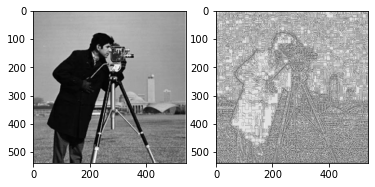

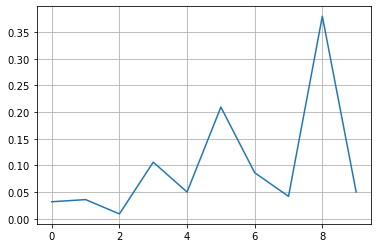

In [67]:
# LOCAL BINARY PATTERNS (LBP)
from skimage.feature import local_binary_pattern
img = cv2.imread('res/photographer.png')

# We define the initial parameters
R = 1 # Radius
P = 8*R # Number of neighboring pixels
epsilon = 1e-7 # To normalize the histogram

# Extract the LBP image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lbp_image = local_binary_pattern(img_gray, P, R, method='uniform')
a,b = np.unique(lbp_image, return_counts=True)

# calculate the histogram
lbp_image = np.uint8(lbp_image)
hist = cv2.calcHist([lbp_image.ravel()], [0], None, [P+2], [0, P+2])

# normalize the histogram
hist = hist.astype("float")
hist /= (hist.sum() + epsilon)

# The P+2=10 bins of the histogram will be the 10 attributes that will allow us to characterize an image

# Display the LBP image
figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(lbp_image, cmap='gray')
plt.show()

# Display the histogram
plt.plot(hist)
plt.grid(True)
plt.show()

# IMAGE RECOGNITION

### Mark points with the mouse - sometimes it crashes when trying to close it


In [68]:
# Double click to select a point, and then click 'p' to print it

def draw_circle(event,x,y,flags,param):
    global mouseX,mouseY
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),3,(255,0,0),-1)
        mouseX,mouseY = x,y
        print (f'({mouseX}, {mouseY})')

In [69]:
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(True):
    cv2.imshow('image',img)
    k = cv2.waitKey(20) & 0xFF
    if k == 27: # tecla esc
        break
    elif k == ord('p'):
        print (mouseX,mouseY)
        
# Destroy all the windows
cv2.destroyAllWindows()

(331, 255)


### Access the webcam and apply Canny border detector


Change thresholds by hand while playing with:
- down_threshold: o, p  (+,-) 
- up_threshold:   l, ;  (+,-)

In [70]:
# define a video capture object
vid = cv2.VideoCapture(0)
down_threshold = 0
up_threshold = 150

print(vid.read()[1].shape)
        
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

while(True):
    ret, frame = vid.read()
  
    frame = cv2.flip(frame, 1) # volteamos la imagen
    
    # convertimos a BW y aplicamos gaussian blur para que 
    # los bordes se detecten con mayor facilidad
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # to BW
    frame = cv2.GaussianBlur(frame,(5,5),0) # gaussian blur de 7x7
#     frame = (255-frame)
    edges = cv2.Canny(frame,down_threshold,up_threshold)
#     resized = cv2.resize(frame, (75,75), interpolation = cv2.INTER_AREA)
#     resized = cv2.resize(resized, (1024,1024), interpolation = cv2.INTER_AREA)
    

    # Change thresholds by hand while playing
    if cv2.waitKey(1) & 0xFF == ord('p'):
        if up_threshold <= 234:
            up_threshold = up_threshold + 10
    if cv2.waitKey(1) & 0xFF == ord('o'):
        if  up_threshold >= 10:
            up_threshold = up_threshold - 10
    if cv2.waitKey(1) & 0xFF == ord('ñ'):
        if down_threshold <= 234:
            down_threshold = down_threshold + 10
    if cv2.waitKey(1) & 0xFF == ord('l'):
        if down_threshold >= 10:
            down_threshold = down_threshold - 10
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText1 = (10,440)
    bottomLeftCornerOfText2 = (10,470)

    # print the threshold
    cv2.putText(edges,"down_threshold: "+str(down_threshold), bottomLeftCornerOfText1, cv2.FONT_HERSHEY_SIMPLEX, 1, 500, thickness=2)
    cv2.putText(edges,"up_threshold:   "+str(up_threshold), bottomLeftCornerOfText2, cv2.FONT_HERSHEY_SIMPLEX, 1, 500, thickness=2)

    cv2.imshow('image', edges)
    
    # close ESC
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
    
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

(480, 640, 3)
(290, 284)
(233, 260)


## Local Descriptors based on points of interest

#### Binary Descriptors

#### SURF

#### SIFT algorithm

(1672, 128)
[[ 19.   4.   4. ...   4.  29. 144.]
 [ 13.   0.   0. ...  23.  84.  39.]
 [  1.   1.   3. ...  81.  27.   1.]
 ...
 [ 41.  41.  87. ...   0.   4.   6.]
 [  2.   6.  26. ...  44. 157.   6.]
 [ 20.  14.   1. ...  78. 146.   1.]]


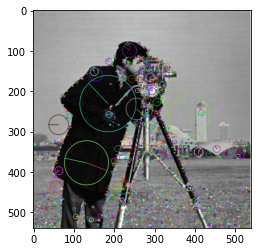

In [61]:
img = cv2.imread('res/photographer.png', 0)

# Algorithm definition
sift = cv2.SIFT_create()

# We identify points of interest
kp = sift.detect(img, None)

# Extract the descriptor to obtain the fingerprint
kp, des = sift.compute(img, kp)
print(np.shape(des))
print(des) # Matrix where the rows are the keypoints and the columns are the features of those keypoints

# We visualize the points of interest
img_int=cv2.drawKeypoints(img, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_int)
plt.show()

0.01692507602274418
(1323, 128)


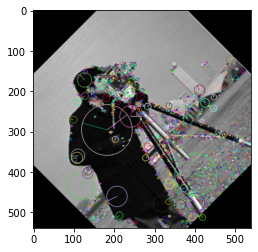

In [62]:
# SIFT algorithm
rows, cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),angle=45,scale=1)
img_2 = cv2.warpAffine(img,M,(cols,rows))

# We identify points of interest
kp_2 = sift.detect(img_2, None)
k = kp_2[0]
print(k.response)


# Extract the descriptor to obtain the fingerprint
kp_2, des_2 = sift.compute(img_2, kp_2)
print(np.shape(des_2))

# We visualize the points of interest
img_int_2=cv2.drawKeypoints(img_2, kp_2, img_2.copy(), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_int_2)
plt.show()

## Feature matching

(968,)


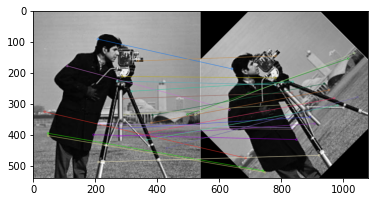

In [63]:
# execute first the previus code (sift) to compare the images
bf = cv2.BFMatcher.create(cv2.NORM_L1, crossCheck=True)

matches = bf.match(des, des_2)
matches = sorted(matches, key = lambda x:x.distance)

print(np.shape(matches))

img_match = cv2.drawMatches(img, kp, img_2, kp_2, matches[:25], img_2, flags=10)
plt.imshow(img_match)
plt.show()

## Face detection


- Mediapipe
- Caffe2 (Better Confidence score than Mediapipe with almost same fps)
  - Deep Learning
  - Definition of the model architecture https://github.com/opencv/opencv/blob/master/samples/dnn/face_detector/deploy.prototxt
  - Model with RN layer weights https://github.com/opencv/opencv_3rdparty/tree/dnn_samples_face_detector_20170830
  

### Mediapipe

In [71]:
# from image/video
import cv2
import mediapipe as mp
import time

cap = cv2.VideoCapture("res/video.mp4")
pTime = 0

mpFaceDetection = mp.solutions.face_detection
mpDraw = mp.solutions.drawing_utils
faceDetection = mpFaceDetection.FaceDetection(0.75)

while True:
    success, img = cap.read()

    if img is None:
        break
        
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = faceDetection.process(img)
    #print(results)

    if results.detections:
        for id, detection in enumerate(results.detections):
            # mpDraw.draw_detection(img, detection)
            # print(id, detection)
            # print(detection.score)
            # print(detection.location_data.relative_bounding_box)
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, ic = img.shape
            bbox = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
            cv2.rectangle(img, bbox, (255, 0, 255), 2)
            #cv2.putText(img, f'{int(detection.score&#91;0] * 100)}%', (bbox&#91;0], bbox&#91;1] - 20), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 255), 2)

    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime
                        
    cv2.putText(img, f'FPS: {int(fps)}', (20, 70), cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), 2)
    cv2.imshow("Image", img)
    cv2.waitKey(1)

# After the loop release the cap object
cap.release()
# Destroy all the windows
cv2.destroyAllWindows()

- Face detection on Video (Webcam)

In [72]:
import cv2
import mediapipe as mp
import time

cap = cv2.VideoCapture(0)
pTime = 0

mpFaceDetection = mp.solutions.face_detection
mpDraw = mp.solutions.drawing_utils
confidence_threshold = 0.8
faceDetection = mpFaceDetection.FaceDetection(confidence_threshold)

while True:
    success, img = cap.read()

    imgRGB = cv2.flip(img, 1) #cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = faceDetection.process(imgRGB)
    # print(results)

    if results.detections:
        for id, detection in enumerate(results.detections):
            # mpDraw.draw_detection(img, detection)
            # print(id, detection)
            # print(detection.score)
            # print(detection.location_data.relative_bounding_box)
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, ic = img.shape
            #print(img.shape)
            bbox = int(-bboxC.xmin * iw + 320 + (bboxC.width * iw)/2.5), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
            #print(bbox)
            cv2.rectangle(img, bbox, (0, 0, 255), 2)
            text = f"{detection.score[0] * 100:.2f}"        

            cv2.putText(img, text, (bbox[0], bbox[1] - 20), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)

        cTime = time.time()
        fps = 1 / (cTime - pTime)
        pTime = cTime

        cv2.putText(img, f'FPS: {int(fps)}', (20, 70), cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), 2)
        cv2.imshow("Image", img)

                            # close ESC
        if cv2.waitKey(1) & 0xFF == 27:
            break
            
# After the loop release the cap object
cap.release()
# Destroy all the windows
cv2.destroyAllWindows()

### Caffe

In [73]:
proto_path = path.join("res", "deploy.prototxt.txt")
model_path = path.join("res", "res10_300x300_ssd_iter_140000.caffemodel")
people_path = path.join("res", "people.jpg")

In [74]:
# Load model into DNN from OpenCV
net = cv2.dnn.readNetFromCaffe(proto_path, model_path)

(1280, 1920)


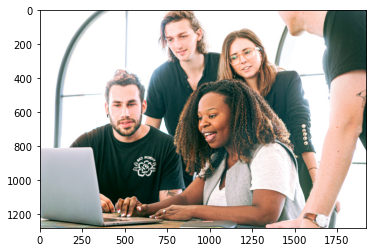

In [75]:
# Image to analyze
img = cv2.imread(people_path)
(h, w) = img.shape[:2]
print((h, w))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [76]:
# Preprocess image resize 300x300, scale factor, image_size, mean values color channels
blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

In [77]:
# Send image to the neural network
net.setInput(blob)
detections = net.forward()

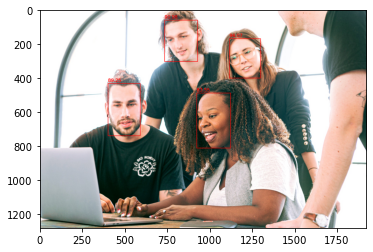

Nº of detections: 4


In [78]:
# - Array of detections
# - Confidence threshold

confidence_threshold = 0.8
num_faces = 0

for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > confidence_threshold:
        num_faces += 1
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        text = f"{confidence * 100:.2f}"        
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(img, (startX, startY), (endX, endY),(0, 0, 255), 2)
        cv2.putText(img, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.85, (0, 0, 255), 2)

# cv2.imshow('Image', img)
# cv2.waitKey(0)
# cv2.destroyWindow('Image')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

print(f'Nº of detections: {num_faces}')

- Face detection on Video (Webcam)

In [79]:
import cv2
import numpy as np

from os import path
import time

proto_path = path.join("res", "deploy.prototxt.txt")
model_path = path.join("res", "res10_300x300_ssd_iter_140000.caffemodel")

# Load model into DNN from OpenCV
net = cv2.dnn.readNetFromCaffe(proto_path, model_path)

# define a video capture object
vid = cv2.VideoCapture(0)
pTime = 0
print(vid.read()[1].shape)

(h, w) = vid.read()[1].shape[0], vid.read()[1].shape[1] 

# cv2.namedWindow('image')
# cv2.setMouseCallback('image', draw_circle)

confidence_threshold = 0.8

while(True):
    ret, frame = vid.read()
    
    frame = cv2.flip(frame, 1) 
    
    # Preprocess image resize 300x300, scale factor, image_size, mean values color channels
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    # Send image to the neural network
    net.setInput(blob)
    detections = net.forward()
    
    # draw detections
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > confidence_threshold:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            text = f"{confidence * 100:.2f}"        
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY),(0, 0, 255), 2)
            cv2.putText(frame, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.85, (0, 0, 255), 2)
            # print(startX, startY, endX, endY)
    
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime

    cv2.putText(frame, f'FPS: {int(fps)}', (20, 70), cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), 2)

    cv2.imshow('image', frame)
    
    # close ESC
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

(480, 640, 3)
